In [1]:
import torch as tr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from torch import nn
import torchvision
from torchvision import transforms
from torchvision.transforms import ToTensor

C:\Users\pwrxn\miniconda3\envs\pytorch\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
print(tr.__version__)
print(torchvision.__version__)

2.1.0
0.15.2a0


In [3]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root='data', 
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root='data', 
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
# Check the shape of our image
print(f'Image shape: {image.shape} -> [color channels, height, width]')
print(f'Image label: {class_names[label]}')

Image shape: torch.Size([1, 28, 28]) -> [color channels, height, width]
Image label: Ankle boot


Image shape: torch.Size([1, 28, 28])


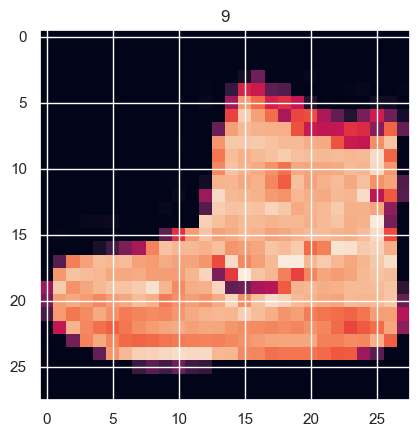

In [10]:
image, label = train_data[0]
print(f'Image shape: {image.shape}')
plt.imshow(image.squeeze())
plt.title(label);

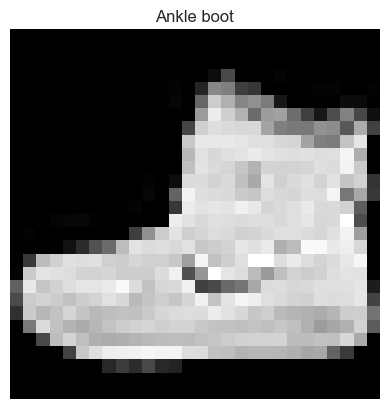

In [11]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False);

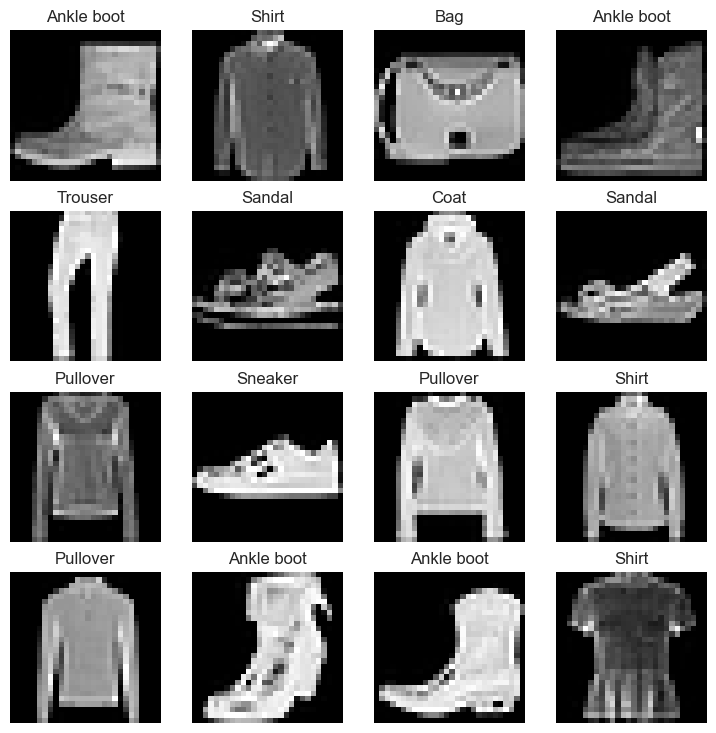

In [12]:
# Plot more images
tr.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    random_idx = tr.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='grey')
    plt.title(class_names[label])
    plt.axis(False);

In [13]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
batch = 32

# Turn data into iterables
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=batch,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=batch,
                             shuffle=False)

In [14]:
print(f'DataLoaders: {train_dataloader, test_dataloader}')
print(f'Lenght of train_dataloader: {len(train_dataloader)} batches of {batch}...')
print(f'Lenght of test_dataloader: {len(test_dataloader)} batches of {batch}...')

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001AB461931F0>, <torch.utils.data.dataloader.DataLoader object at 0x000001AB46192D10>)
Lenght of train_dataloader: 1875 batches of 32...
Lenght of test_dataloader: 313 batches of 32...


In [15]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

Image size: torch.Size([1, 28, 28])
Label: 6. label size: torch.Size([])


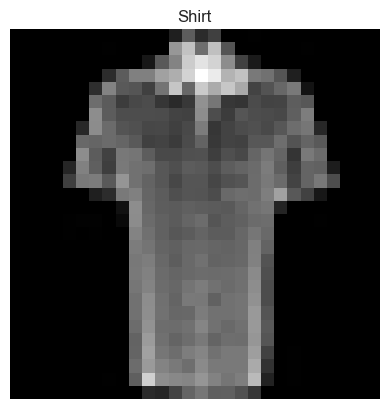

In [16]:
# Show a sample
tr.manual_seed(42)
random_idx = tr.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='grey')
plt.title(class_names[label])
plt.axis(False)
print(f'Image size: {img.shape}')
print(f'Label: {label}. label size: {label.shape}')

In [17]:
# Model 0 - baseline model
# Creating a flatten layer
flatten_model = nn.Flatten()

# get single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

print(f'Shape before flattening: {x.shape}')
print(f'Shape after flattening: {output.shape}')

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [18]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [19]:
tr.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names) # one for every class
)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x = tr.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

## Setup loss, optimizer and evaluation metrics

In [21]:
import requests
from pathlib import Path

# Download helper functions
if Path('helper_functions.py').is_file():
    print('file already exists')
else:
    print('Downloading helper_functions.py')
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
    with open('helper_functions.py', 'wb') as f:
        f.write(request.content)

file already exists


In [22]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = tr.optim.SGD(params=model_0.parameters(),
                         lr=0.1)

## Creating a function to time our experiments

In [23]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: tr.device = None):
    ''' Print difference between start and end time.'''
    total_time = end - start
    print(f'Train time on {device}: {total_time:.3f} seconds')
    return total_time

In [24]:
start_time = timer()
# Some code...
end_time = timer()
print_train_time(start=start_time,
                 end=end_time,
                 device='cpu')

Train time on cpu: 0.000 seconds


2.7499860152602196e-05

## Creating a training loop and training a model on batches of data

In [25]:
from tqdm.auto import tqdm

tr.manual_seed(42)
train_time_start = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n------')
    # Training 
    train_loss = 0
    # add a loop to loop through the training bathes
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # Forward pass
        y_pred = model_0(X)

        # Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        # Print out what's happening
        if batch % 400 == 0:
            print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples')

# Divide total train loss by length of train dataloader
train_loss /= len(train_dataloader)

# Testing
test_loss, test_acc = 0, 0
model_0.eval()
with tr.inference_mode():
    for X_test, y_test in test_dataloader:
        # Forward pass
        test_pred = model_0(X_test)

        # Calculate the loss
        test_loss += loss_fn(test_pred, y_test)

        # Calculate accuracy
        test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)

# Print out what's happening
print(f'\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}')

# Calculate training time
train_time_end = timer()
total_train_time_model_0 = print_train_time(start=train_time_start,
                                            end=train_time_end,
                                            device=str(next(model_0.parameters())))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Epoch: 1
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Epoch: 2
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.4532 | Test loss: 0.5109, Test acc: 82.3782
Train time on Parameter containing:
tensor([[ 0.0273,  0.0298, -0.0068,  ..., -0.0018,  0.0072,  0.0173],
        [-0.0189, -0.0355,  0.0157,  ...,  0.0174,  0.0110,  0.0108],
        [-0.0008,  0.0019,  0.0032,  ...,  0.0121, -0.0118,  0.0077],
        ...,
        [-0.0115,  0.0275, -0.0321,  ...,  0.0541,  0.0470,  0.0010],
        [-0.0231,  0.0252,  0.0238,  ..., -0.0809, -0.0377, -0.0076],
        [ 0.0175, -0.0148,  0.0030,  ..., -0.1108, -0.06

## make predictions and get Model 0 results

In [26]:
tr.manual_seed(42)
def eval_model(model: tr.nn.Module,
               data_loader: tr.utils.data.DataLoader,
               accuracy_fn,
               loss_fn = tr.nn.Module):
    '''Returns dictionary containing the results of model predicting on data loader'''
    loss, acc = 0, 0
    model.eval()
    with tr.inference_mode():
        for X, y in tqdm(data_loader):
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {'model_name': model.__class__.__name__,# only works when model was created with a class
            'model_loss': loss.item(),
            'model_acc': acc}

# Calculate model_0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5108762979507446,
 'model_acc': 82.37819488817891}

## Building a better model with Non-Linearity

In [27]:
# Creating a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                input_shape: int,
                hidden_units: int,
                output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, 
                      out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: tr.Tensor):
        return self.layer_stack(x)

In [28]:
tr.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, 
                              hidden_units=10,
                              output_shape=len(class_names))
next(model_1.parameters())

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
        [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
        [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
       requires_grad=True)

## Setup loss, optimizer and evaluation metrics

In [29]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = tr.optim.SGD(params=model_1.parameters(),
                         lr=0.1)

## Functionizing training and evaluation/testing loops

In [30]:
def train_step(model: tr.nn.Module,
               data_loader: tr.utils.data.DataLoader,
               loss_fn: tr.nn.Module,
               optimizer: tr.optim.Optimizer,
               accuracy_fn,
               device: tr.device = None):
    ''' Performs a training with model trying to learn on data_loader.'''
    train_loss, train_acc = 0, 0
    # Put model into training mode
    model.train()
    # Training 
    train_loss = 0
    # add a loop to loop through the training bathes
    for batch, (X, y) in enumerate(data_loader):
        
        # Forward pass
        y_pred = model(X)
        
        # Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    # Divide total train loss by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
     # Print out what's happening
    print(f'Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%')

In [31]:
def test_step(model: tr.nn.Module,
              data_loader: tr.utils.data.DataLoader,
              loss_fn: tr.nn.Module,
              accuracy_fn,
              device: tr.device = None):
    ''' Performs a testing loop step on model going over data_loader'''
    test_loss, test_acc = 0, 0

    model.eval()

    with tr.inference_mode():
        for X, y in data_loader:
            test_pred = model(X)

            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred = test_pred.argmax(dim=1))

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f'Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n')

In [32]:
tr.manual_seed(42)

train_time_start_model1 = timer()

# Set epochs
epochs = 3

# Create an optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n-------')
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn)
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn)

train_time_end_model1 = timer()
total_train_time_model1 = print_train_time(start=train_time_start_model1,
                                           end=train_time_end_model1)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 1.09199 | Train acc: 61.34%
Test loss: 0.95636 | Test acc: 65.00%

Epoch: 1
-------
Train loss: 0.78101 | Train acc: 71.93%
Test loss: 0.72227 | Test acc: 73.91%

Epoch: 2
-------
Train loss: 0.67027 | Train acc: 75.94%
Test loss: 0.68500 | Test acc: 75.02%

Train time on None: 29.017 seconds


In [33]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## Model 2: Building a Convolutional Neural Netwrok (CNN)

In [34]:
# Creating a CNN
class FashionMNISTModelV2(nn.Module):
    '''
    Model architecture that replicates the TinyVGG
    model from CNN explainer website.
    '''
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential( 
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(f'Output shape of conv_block_1: {x.shape}')
        x = self.conv_block_2(x)
        # print(f'Output shape of conv_block_1: {x.shape}')
        x = self.classifier(x)
        # print(f'Output shape of classifier: {x.shape}')
        return x

In [35]:
tr.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names))
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

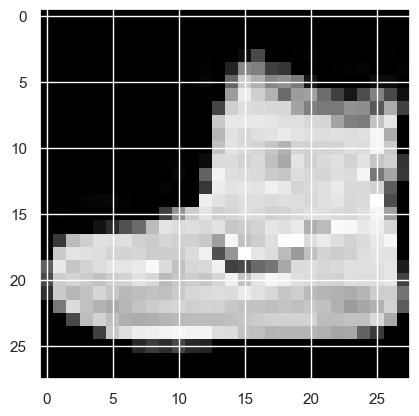

In [36]:
plt.imshow(image.squeeze(), cmap='grey')

In [37]:
rand_image_tensor = tr.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [38]:
model_2(rand_image_tensor.unsqueeze(0))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

## Stepping through nn.Conv2D()

In [39]:
tr.manual_seed(42)

# Create a batch of "images"
images = tr.randn(size=(32,3,64,64))
test_image = images[0]

print(f'Image batch shape: {image.shape}')
print(f'Single image shape: {test_image.shape}')
print(f'Test image:\n {test_image}')

Image batch shape: torch.Size([1, 28, 28])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.797

In [40]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [41]:
tr.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3, 
                       out_channels=10,
                       kernel_size=3,
                       padding=0)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

## Stepping through nn.MaxPool2D()

In [42]:
# Print out original image shape without unsqueezed dimension
print(f'Test image original shape: {test_image.shape}')
print(f'Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}')

# Creating a sample nn.MaxPool2D layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f'Shape after going through conv_layer(): {test_image_through_conv.shape}')

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f'Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}')

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [43]:
tr.manual_seed(42)
# Create a random tensor with a similar number of dimensions to our images
random_tensor = tr.randn(size=(1,1,2,2))

max_pool_layer = nn.MaxPool2d(kernel_size=2)

max_pool_tensor = max_pool_layer(random_tensor)
print(f'\nMax pool tensor:\n {max_pool_tensor}')
print(f'Max pool tensor shape: {max_pool_tensor.shape}')
random_tensor


Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

## Setup a loss function and optimizer 

In [44]:
# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = tr.optim.SGD(params=model_2.parameters(),
                         lr=0.1)

## Training and testing `model_2` using our training and test functions

In [45]:
tr.manual_seed(42)


train_time_start_model_2 = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n-------')
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn)
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.58646 | Train acc: 78.67%
Test loss: 0.39175 | Test acc: 86.24%

Epoch: 1
-------
Train loss: 0.36231 | Train acc: 86.98%
Test loss: 0.35555 | Test acc: 86.82%

Epoch: 2
-------
Train loss: 0.32485 | Train acc: 88.18%
Test loss: 0.31462 | Test acc: 88.65%

Train time on None: 68.601 seconds


In [46]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31462037563323975,
 'model_acc': 88.64816293929712}

## Compare model results and training time

In [47]:
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.510876,82.378195
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.314620,88.648163


In [48]:
# Add training time to results comparison
compare_results['training_time'] = [total_train_time_model_0,
                                    total_train_time_model1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.510876,82.378195,26.958245
1,FashionMNISTModelV1,0.685001,75.019968,29.017038
2,FashionMNISTModelV2,0.314620,88.648163,68.601113


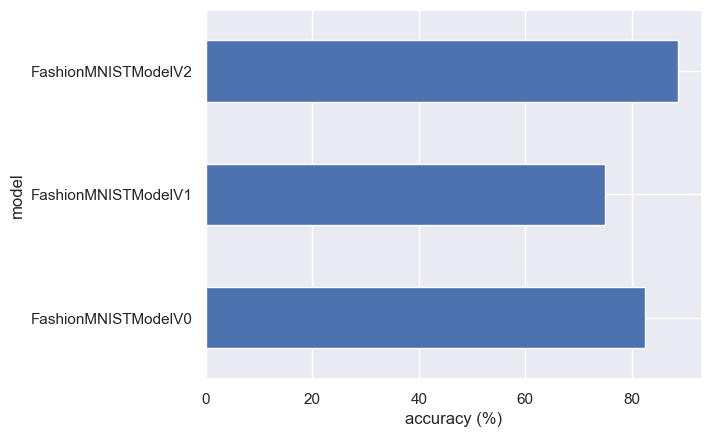

In [49]:
# Visulalize our model results
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel('accuracy (%)')
plt.ylabel('model');

## Make and evaluate random predictions with best model

In [64]:
def make_predictions(model: tr.nn.Module,
                     data: list,
                     device: tr.device = None):
    pred_probs = []
    model.eval()
    with tr.inference_mode():
        for sample in data:
            # Prepare the sample (add batch dimensions and pass to target device)
            sample = tr.unsqueeze(sample, dim=0)

            # Forward pass (model output raw logits)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = tr.softmax(pred_logit.squeeze(), dim=0)

            pred_probs.append(pred_prob)

    # Stack the pred_probs to turn list into a tensor
    return tr.stack(pred_probs)

In [65]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

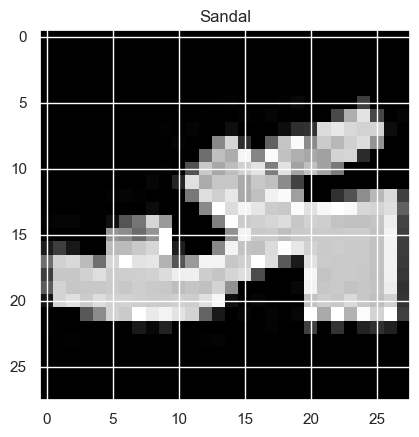

In [66]:
plt.imshow(test_samples[0].squeeze(), cmap='grey')
plt.title(class_names[test_labels[0]]);

In [67]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two predictions probabilites
pred_probs[:2]

tensor([[7.8787e-08, 3.1045e-08, 4.0763e-08, 9.7504e-08, 5.9535e-08, 9.9985e-01,
         6.8096e-07, 1.4373e-06, 3.0051e-06, 1.4801e-04],
        [2.6615e-02, 7.8704e-01, 4.1836e-04, 5.4062e-02, 4.1720e-02, 3.5331e-05,
         8.9646e-02, 1.2413e-04, 9.4913e-05, 2.4925e-04]])

In [68]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

In [69]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

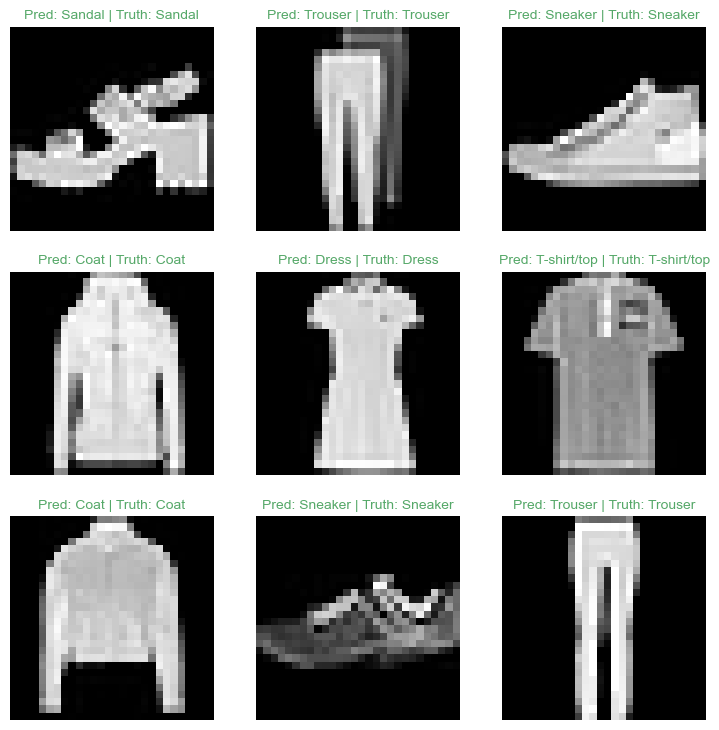

In [72]:
# Plot predictions 
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(sample.squeeze(), cmap='grey')

    # Find predictions (in text form, e.g 'Sandal')
    pred_label = class_names[pred_classes[i]]

    # Get the truth label (in text form)
    truth_label = class_names[test_labels[i]]

    # Create a title for the plot
    title_text = f'Pred: {pred_label} | Truth: {truth_label}'

    # Check for equallity between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g') # green text if predictions same as truth
    else:
        plt.title(title_text, fontsize=10, c='r')
    plt.axis(False)